# Loading Libraries and the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 24s 6us/step


In [8]:
first_img = x_train[0]

In [9]:
first_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

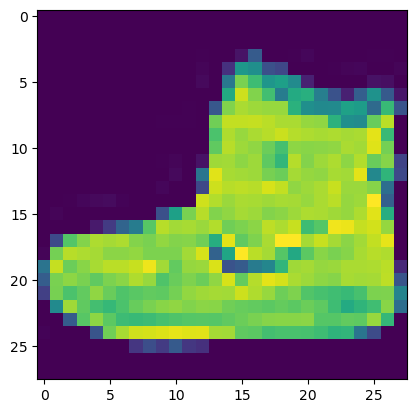

In [10]:
plt.imshow(first_img)

# Preprocessing The Data

In [19]:
scaled_train = x_train/255
scaled_test = x_test/255.0

In [20]:
scaled_train[0].max()

1.0

In [21]:
scaled_train.shape

(60000, 28, 28)

In [22]:
scaled_test.shape

(10000, 28, 28)

In [23]:
x_train = scaled_train.reshape(60000, 28, 28,1)
x_test = scaled_test.reshape(10000, 28, 28,1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
y_cat_train = to_categorical(y_train)

In [30]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
y_cat_test = to_categorical(y_test)

In [39]:
x_train.shape

(60000, 28, 28, 1)

# Building the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [40]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [45]:
len(x_train)

60000

# Training the Model

In [46]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2548 - accuracy: 0.9073
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2227 - accuracy: 0.9186
Epoch 3/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1974 - accuracy: 0.9272
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1790 - accuracy: 0.9343
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1639 - accuracy: 0.9403
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1506 - accuracy: 0.9450
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1369 - accuracy: 0.9505
Epoch 8/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1244 - accuracy: 0.9555
Epoch 9/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1145 - accuracy: 0.9591
Epoch 10/10
1875/1875 [==============================] - 64s 34m

# Model Evaluation

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.3406 - accuracy: 0.9098


[0.3405802845954895, 0.9097999930381775]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 3s 11ms/step


In [58]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [59]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.85      0.84      1000
           3       0.91      0.93      0.92      1000
           4       0.83      0.87      0.85      1000
           5       0.99      0.96      0.97      1000
           6       0.83      0.68      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Axes: >

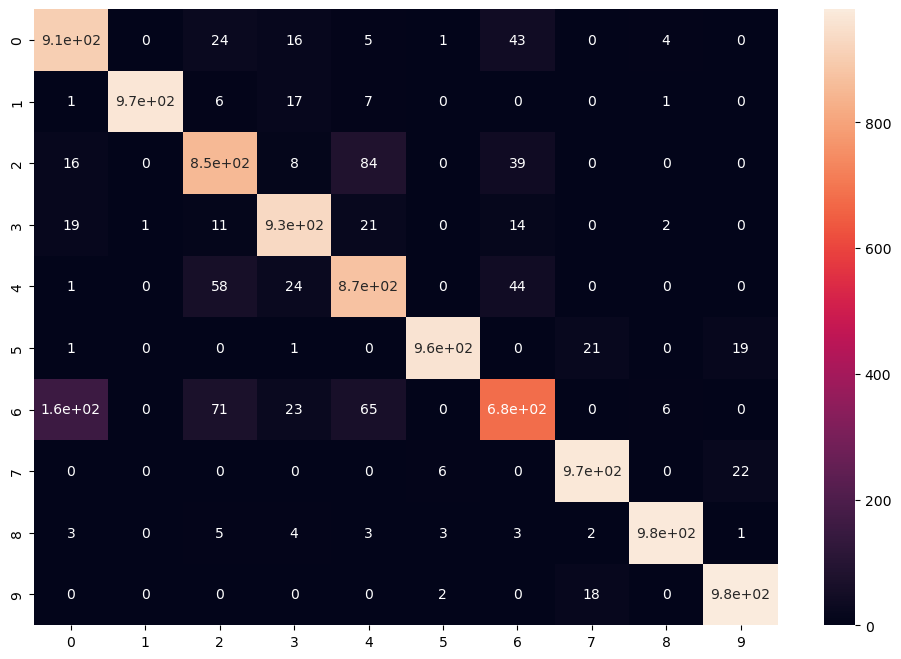

In [63]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)